# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

*Jason Wu*

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

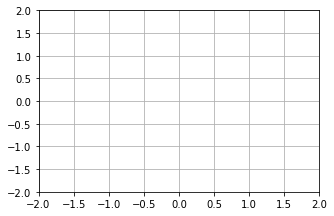

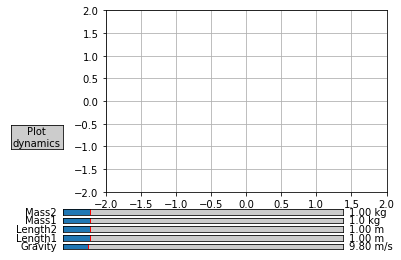

In [13]:
"""
Python chaotic double pendulum demonstration of 
matplotlib animation and interaction.
Based on the matplotlib demo from:
http://matplotlib.org/examples/animation/double_pendulum_animated.html
Double pendulum formula translated from the C code at
http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c
"""


from numpy import sin, cos, pi, array
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button, RadioButtons
#import pdb

########################
## Physics
########################


global G,L1,L2,M1,M2
G =  9.8 # acceleration due to gravity, in m/s^2
L1 = 1.0 # length of pendulum 1 in m
L2 = 1.0 # length of pendulum 2 in m
M1 = 1.0 # mass of pendulum 1 in kg
M2 = 1.0 # mass of pendulum 2 in kg


def derivs(state, t, G,L1,L2,M1,M2):
    """
    This function defines the Langrangian derivatives
    to serve the ODE integator
    """
    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2]-state[0]
    den1 = (M1+M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_)
               + M2*G*sin(state[2])*cos(del_) + M2*L2*state[3]*state[3]*sin(del_)
               - (M1+M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_)
               + (M1+M2)*G*sin(state[0])*cos(del_)
               - (M1+M2)*L1*state[1]*state[1]*sin(del_)
               - (M1+M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..10s sampled at 0.025 second steps
dt = 0.025
t = np.arange(0.0, 10, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

rad = pi/180


def dophysics(G,L1,L2,M1,M2):
  """
  This function runs the ODE integrator and interprets the results
  """
  # initial state
  global state
  state = np.array([th1, w1, th2, w2])*pi/180.
  # integrate your ODE using scipy.integrate.
  global y,x1,y1,x2,y2
  y = integrate.odeint(derivs, state, t, args=(G,L1,L2,M1,M2))

  x1 = L1*sin(y[:,0])
  y1 = -L1*cos(y[:,0])

  x2 = L2*sin(y[:,2]) + x1
  y2 = -L2*cos(y[:,2]) + y1

## Do initial calculatiData browserons
dophysics(G,L1,L2,M1,M2)

########################
## Plot setup
########################

fig = plt.figure()

## Draw the main plotting window
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
## resize the plot to leave room for buttons
plt.subplots_adjust(left=0.25, bottom=0.25)
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


########################
## Sliders
########################

## Color for the sliders, RGB
bcolor=(0.8,0.8,0.8)

def update(val):
    # Grab values from the sliders
    G = s_grav.val
    L1 = s_L1.val
    L2 = s_L2.val
    M1 = s_M1.val
    M2 = s_M2.val
    
    #Recompute simulation
    dophysics(G,L1,L2,M1,M2)
    
    ##Readjust axes
    mL=(L1+L2)*1.1
    ax.axis([-mL,mL,-mL,mL])
    #l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    
    
    ## Also update the plot grid if the user has opened them
    global made_button
    if made_button:
        global b_lines,b_axs
        b_lines[0][0].set_data(t,x1)
        b_lines[1][0].set_data(t,y1)
        b_lines[0][1].set_data(t,x2)
        b_lines[1][1].set_data(t,y2)
        b_axs[0,0].axis([min(t),max(t),-max(abs(x1)),max(abs(x1))])
        b_axs[1,0].axis([min(t),max(t),-max(abs(y1)),max(abs(y1))])
        b_axs[0,1].axis([min(t),max(t),-max(abs(x2)),max(abs(x2))])
        b_axs[1,1].axis([min(t),max(t),-max(abs(y2)),max(abs(y2))])
        plt.show()
    
    plt.draw()

axp_s=0.02;si=0;sw=0.02
##Gravity
si+=1
ax_grav = plt.axes([0.15, axp_s+si*(0.01+sw), 0.65, sw], facecolor=bcolor)
s_grav = Slider(ax_grav, 'Gravity', 1, 100, valinit=G,valfmt='%0.2f m/s')
s_grav.on_changed(update)
##Length1
si+=1
ax_L1 = plt.axes([0.15, axp_s+si*(0.01+sw), 0.65, sw], facecolor=bcolor)
s_L1 = Slider(ax_L1, 'Length1', 0.01, 10, valinit=L1,valfmt='%0.2f m')
s_L1.on_changed(update)
##Length2
si+=1
ax_L2 = plt.axes([0.15, axp_s+si*(0.01+sw), 0.65, sw], facecolor=bcolor)
s_L2 = Slider(ax_L2, 'Length2', 0.01, 10, valinit=L2,valfmt='%0.2f m')
s_L2.on_changed(update)
##Mass1
si+=1
ax_M1 = plt.axes([0.15, axp_s+si*(0.01+sw), 0.65, sw], facecolor=bcolor)
s_M1 = Slider(ax_M1, 'Mass1', 0.01, 10, valinit=M1,valfmt='%0.1f kg')
s_M1.on_changed(update)
##Mass2
si+=1
ax_M2 = plt.axes([0.15, axp_s+si*(0.01+sw), 0.65, sw], facecolor=bcolor)
s_M2 = Slider(ax_M2, 'Mass2', 0.01, 10, valinit=M2,valfmt='%0.2f kg')
s_M2.on_changed(update)


########################
## Buttons
########################

##### Button to open seperate plot for dynamics
xplotax = plt.axes([0.03, 0.4, 0.12, 0.08])
b_xplot = Button(xplotax, 'Plot\ndynamics', color=bcolor, hovercolor='0.975')

made_button=0
## The function executed by the button
def xplot(event):
  global made_button,b_lines,b_axs,b_fig
  ## Logic - did the user open the plots?
  if made_button: #close existing plot	
    plt.close(b_fig)
    made_button=0
  else: 
    made_button=1
    ## Create a holder for the plot lines
    b_lines=[['',''],['','']]
    
    ## Setup plot grid
    ##auto-update
    plt.ion()
    b_fig,b_axs=plt.subplots(2,2,sharex='all')
    
    ### Mass 1
    b_axs[0,0].set_title('Mass 1')
    ## x plot
    b_lines[0][0],=b_axs[0,0].plot(t,x1)
    b_axs[0,0].set_ylabel('X position (m)')
    b_axs[0,0].axis([min(t),max(t),-max(abs(x1)),max(abs(x1))])
    ## y plot
    b_lines[1][0],=b_axs[1,0].plot(t,y1)
    b_axs[1,0].set_xlabel('Time (s)')
    b_axs[1,0].set_ylabel('Y position (m)')
    b_axs[1,0].axis([min(t),max(t),-max(abs(y1)),max(abs(y1))])
    
    ### Mass 1
    b_axs[0,1].set_title('Mass 2')
    ## x plot
    b_lines[0][1],=b_axs[0,1].plot(t,x2)
    b_axs[0,1].set_ylabel('X position (m)')
    b_axs[0,1].axis([min(t),max(t),-max(abs(x2)),max(abs(x2))])
    ## x plot
    b_lines[1][1],=b_axs[1,1].plot(t,y2)
    b_axs[1,1].set_xlabel('Time (s)')
    b_axs[1,1].set_ylabel('Y position (m)')
    b_axs[1,1].axis([min(t),max(t),-max(abs(y2)),max(abs(y2))])
    
    b_fig.subplots_adjust(hspace=0,wspace=0.3)
    plt.show()
  
  
b_xplot.on_clicked(xplot)





########################
## Animation
########################

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*dt))
    
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
    interval=25, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15, clear_temp=True)
plt.show()

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

In [12]:
import numpy as np

# Constants
M = 20        # grid squares per side
V = 1.0        # Voltage at the top
target = 1e-2  # target accuracy

# arrays
phi = np.zeros([M+1,M+1],float) # initialize
phi[0,:] = V
phiprime = np.zeros([M+1, M+1],float) # container for new values

# print(phi)

# Main Loop
delta = 1.0
while delta > target:
    # calculate new values of the potential

    for i in range(M+1):
        for j in range(M+1):

            # if boundary
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4.
    
    # NOTE: indentation is very important!
    # convergence check
    delta = np.max(np.abs(phi-phiprime))
            
    # swap arrays
    phi, phiprime = phiprime, phi

            
# print(phi)

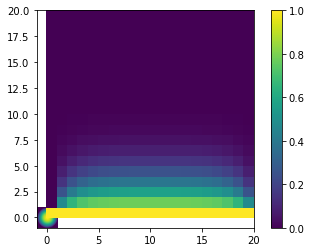

In [13]:

import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()